# HEALTH PROFESSIONALS REGISTRY PROVINCE OF NEUQUEN

# [1- Introduction](#1)

# [2- Loading basic libraries](#2)

# [3- Data frame loading](#3)

# [4- Cleaning and transformation](#4)
 
 - ## [A- professionals](#4.A)
 - ## [B- licenses](#4.B)
 - ## [C- Merge professionals and licenses](#4.C)
 - ## [D- Check columns](#4.D)
 - ## [E- Merge prof_lic and professions](#4.E)
 - ## [F- Merge prof_lic_prof and specialties](#4.F)
 - ## [G- Merge prof_lic_prof_spe and effector](#4.G)
 - ## [H- Final transformations](#4.H)

# [5- Data analysis](#5)

# [6- Conclusion](#6)

<a id='1'></a>

---

# 1. Introduction

- The Federal Network of Health Professionals Records (REFEPS in spanish) covers the totality of health workers in Argentina, which is the articulation of the records of professionals from all provinces.

- The design of the file responds to the requirements established in the Ministerial Resolution 604/2005 of the Mercosur, which sets the minimum registration matrix for health professionals, with the objective of having harmonized basic information. This implies standardizing the information of health professionals who are registered in each province.

- The design and structuring of the data included in the form have been developed by the SISA team and approved by the Health Regulation Board and Health Services of the Ministry of Health of the Nation and by the network of health regulation referents and SISA technology.

- Each Provincial Health Ministry uploads its records of professionals, technicians and assistants to the system and articulates them. In this way, if you unify the different records that a professional may have, it can be found in the case that you have enrollments in more than a province, which has more than a profession.

- The following notebook is based on public data from the province of neuquén. If some data were incomplete, random data were generated in order to carry out the analysis.

- Source of data:
http://datos.neuquen.gob.ar/dataset/salud/resource/348847e3-4f4c-4369-ac0c-d08cbfeda60f

<a id='2'></a>

---

# 2. Loading basic libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import random
import folium
from folium.plugins import MarkerCluster
from branca.element import Figure

<a id='3'></a>

---

# 3. Data frame loading

In [4]:
professionals_directory = "Files_used/professionals.csv"
licenses_directory = "Files_used/licenses.csv" 
professions_directory = "Files_used/professions.csv"
specialties_directory = "Files_used/specialties.csv"
effector_directory = "Files_used/effector.csv"

In [5]:
professionals = pd.read_csv(professionals_directory, encoding = "latin1", delimiter = ";")
professionals.head(3)

,TipoDocumentoID,ProfesionalDocumento,TurnoFecha,TurnoHora,ProfesionalCUILCUIT,ProfesionalApellido,ProfesionalNombre,NacionalidadID,ProfesionalFechaNacimiento,ProfesionalLocalidadLaboral,...,ProfesionalFoto,ProfesionalFirma,ProfesionalMatriculaAnio,ProfesionalSobreTurno,ProfesionalMatriculaSuspendida,ProfesionalFchVtoMatricula,Unnamed: 58,Unnamed: 59,Unnamed: 60,Unnamed: 61
0,1,10000317,6/1/2011,1000-01-01 11:30:00,20100003172,MACHADO,HUGO JORGE,11,23/12/1951,Neuquen,...,ÿØÿà,ÿØÿà,1988,NO,NO,23/12/2016,NaN,NaN,NaN,NaN
1,1,10020032,14/2/2012,1000-01-01 12:30:00,20100200326,GEREZ,NESTOR M. IGNACIO,11,14/10/1952,NEUQUEN,...,ÿØÿà,ÿØÿà,1978,NO,NO,14/10/2017,NaN,NaN,NaN,NaN
2,1,10036835,9/11/2011,1000-01-01 12:34:00,27100368353,SANCHEZ,SUSANA,11,11/9/1951,ZAPALA,...,ÿØÿà,ÿØÿà,1983,SI,NO,11/9/2016,NaN,NaN,NaN,NaN


In [6]:
licenses = pd.read_csv(licenses_directory, encoding = "latin1", delimiter = ";")
licenses.head(1)

,ME_TipoDocumentoID,ME_ProfesionalDocumento,ME_ProfesionID,ME_EspecialidadID,ME_ProfesionalApellido,ME_ProfesionalNombre,ME_ProfesionDescripcion,ME_NivelProfesionID,ME_NivelProfesionDescripcion,ME_EspecialidadDescripcion,...,ME_TipoDocumentoDescripcion,ME_EspecialidadMatVieja,ME_EspecialidadMatLibro,ME_EspecialidadMatFolio,ME_EspecialidadMatAnio,ME_SinVencimiento,ME_Comentario,ME_CausaOtorgamiento,Unnamed: 21,Unnamed: 22
0,1,10000317,MD,68,MACHADO,HUGO JORGE,MEDICO,1,Universitario,MEDICINA GENERAL,...,DNI,0,II,84/85,2012,SI,Mantuvo Vigencia por Disposición N°1370/07.-,NaN,NaN,NaN


In [7]:
professions = pd.read_csv(professions_directory, encoding = "latin1", delimiter = ";")
professions.head(3)

,ProfesionID,ProfesionDescripcion,NivelProfesionID,ProfesionUltimaMatriculaDispon,ProfesionEquivalenciaSISA
0,AA,AUX. DE ANESTESIA,3,3,139
1,AE,AUX. DE ENFERMERIA,3,3166,32
2,BO,TEC. EN LABORATORIO,2,221,21


In [8]:
specialties = pd.read_csv(specialties_directory, encoding = "latin1", delimiter = ";")
specialties.head(3)

,EspecialidadID,EspecialidadDescripcion,TipoEspecialidadID
0,1,CLINICA MEDICA,1
1,2,MEDICINA GENERAL Y DE FAMILIA,1
2,3,ALERGIA E INMUNOLOGIA,1


In [9]:
effector = pd.read_csv(effector_directory, encoding = "latin1", delimiter = ";")
effector.head(3)

,idEfector,nombre,idZona,nombreNacion,complejidad,idEfectorSuperior,domicilio,telefono,reponsable,codigoRemediar,cuie,idTipoEfector,codigoSisa
0,1,HOSPITAL DR. NATALIO BURD,2,3500012,3,1,Darrieux e Ing. Ballester - Centenario,489185,"FORTUNA, FABIO",NaN,Q06393,2,"1,05804E+13"
1,2,HOSPITAL DR. JOSE CUEVAS,2,3500080,4,2,Martelotta y Sabin,NaN,"UZAL,MARCELO",NaN,Q06397,2,"1,05804E+13"
2,3,HOSPITAL EL CHOCON,2,3500209,3,3,NEUQUEN S/N - SENILLOSA,NaN,"TORRES, PABLA MIRNA",NaN,Q06407,2,"1,05804E+13"


<a id='4'></a>

---

# 4. Cleaning and transformation

<a id='4.A'></a>

## A. professionals

In [10]:
professionals["ProfesionalSexo"].unique()

array(['Masculino', 'Femenino', ' LIBRO IX', ' EMITIDA 20/01/1983.',
       ' otorgada el 03/06/1985.-', ' CADUCADA el 31/12/2012',
       ' habiendo caducado el 31/12/2012.-',
       ' pero con coincidencia de todos los datos en el registro y con copia en la cual sÃ\xad se visualizan los sellos correspondientes.',
       ' OTORGADA EL 10/03/1980.',
       ' ya que ni en el TÃ\xadtulo ni en el Certificado AnalÃ\xadtico consta el dato del dÃ\xada exacto de aprobaciÃ³n de la Ãºltima materia de la carrera.',
       ' como FarmacÃ©utica', ' DESDE EL 23/04/2010.',
       ' OTORGADA EL 20/12/2002.', ' otorgada el 05/01/1984.', nan,
       ' LIBRO II', ' DE FECHA 13/12/1993.', ' EMITIDA EL 18/01/1982.',
       ' otorgada el 03/11/1990.', ' OTORGADA EL 25/07/1972.',
       ' se comunica al Ministerio de Salud que el Dr. Horacio Miguel AUZMENDI tiene la obligaciÃ³n de autoinhabilitarse para ejercer la profesiÃ³n de mÃ©dico hasta el 15/02/2012.Lo precedente consta en el Expediente NÂ° 4400-1620/

Creation of functions to search for missing data from the column `ProfesionalSexo` in other columns

In [11]:
def search_genre_fem(dataframe, genre_col):
    for i in dataframe.index:
        index_fem = dataframe.at[i, genre_col] != "Femenino"
        if index_fem:
            for column in dataframe.columns:
                if (dataframe.at[i, column] == "Femenino"):
                    dataframe.loc[i, [genre_col, column]] = dataframe.loc[i, [column, genre_col]].values  
                    
    return dataframe

In [12]:
professionals = search_genre_fem(professionals, "ProfesionalSexo")

In [13]:
def search_genre_masc(dataframe, genre_col):
    for i in dataframe.index:
        index_masc = dataframe.at[i, genre_col] != "Masculino"
        if index_masc:
            for column in dataframe.columns:
                if (dataframe.at[i, column] == "Masculino"):
                    dataframe.loc[i, [genre_col, column]] = dataframe.loc[i, [column, genre_col]].values
                    
    return dataframe

In [14]:
professionals = search_genre_masc(professionals, "ProfesionalSexo")

In [15]:
professionals["ProfesionalSexo"].unique()

array(['Masculino', 'Femenino'], dtype=object)

Selection of columns of interest

In [16]:
professionals_columns = ["ProfesionalDocumento", "ProfesionalApellido", "ProfesionalNombre",
                         "ProfesionalFechaNacimiento", "ProfesionalSexo"]

In [17]:
professionals = professionals[professionals_columns]
professionals.head(3)

,ProfesionalDocumento,ProfesionalApellido,ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo
0,10000317,MACHADO,HUGO JORGE,23/12/1951,Masculino
1,10020032,GEREZ,NESTOR M. IGNACIO,14/10/1952,Masculino
2,10036835,SANCHEZ,SUSANA,11/9/1951,Femenino


In [18]:
professionals.shape

(193, 5)

<a id='4.B'></a>

## B. licenses

In [19]:
licenses_columns = ["ME_ProfesionalDocumento", "ME_ProfesionID", "ME_EspecialidadID", "ME_ProfesionalApellido", 
                    "ME_ProfesionalNombre", "ME_ProfesionEspecialidadMatric", "ME_EspecialidadMatAnio"]

In [20]:
licenses = licenses[licenses_columns]

In [21]:
licenses.isna().sum()

ME_ProfesionalDocumento           0
ME_ProfesionID                    0
ME_EspecialidadID                 0
ME_ProfesionalApellido            0
ME_ProfesionalNombre              0
ME_ProfesionEspecialidadMatric    0
ME_EspecialidadMatAnio            0
dtype: int64

In [22]:
licenses.head(3)

,ME_ProfesionalDocumento,ME_ProfesionID,ME_EspecialidadID,ME_ProfesionalApellido,ME_ProfesionalNombre,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio
0,10000317,MD,68,MACHADO,HUGO JORGE,1164,2012
1,10041918,MD,58,LOPEZ,ALBERTO ANGEL,467,2012
2,10042130,MD,58,ITURRIOZ,DANIEL ROMUALDO,426,2000


In [23]:
licenses.shape

(1297, 7)

<a id='4.C'></a>

## C. Merge professionals and licenses

In [24]:
prof_lic = licenses.merge(professionals, left_on = "ME_ProfesionalDocumento", right_on = "ProfesionalDocumento", how = "outer").reset_index()

In [25]:
prof_lic.shape

(1415, 13)

In [26]:
prof_lic.head(3)

,index,ME_ProfesionalDocumento,ME_ProfesionID,ME_EspecialidadID,ME_ProfesionalApellido,ME_ProfesionalNombre,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,ProfesionalDocumento,ProfesionalApellido,ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo
0,0,10000317.0,MD,68.0,MACHADO,HUGO JORGE,1164.0,2012.0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino
1,1,10041918.0,MD,58.0,LOPEZ,ALBERTO ANGEL,467.0,2012.0,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino
2,2,10042130.0,MD,58.0,ITURRIOZ,DANIEL ROMUALDO,426.0,2000.0,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino


In [27]:
prof_lic.isna().sum()

index                                0
ME_ProfesionalDocumento            118
ME_ProfesionID                     118
ME_EspecialidadID                  118
ME_ProfesionalApellido             118
ME_ProfesionalNombre               118
ME_ProfesionEspecialidadMatric     118
ME_EspecialidadMatAnio             118
ProfesionalDocumento              1199
ProfesionalApellido               1199
ProfesionalNombre                 1199
ProfesionalFechaNacimiento        1199
ProfesionalSexo                   1199
dtype: int64

Replace nulls of the columns `ME_ProfesionalDocumento, ME_ProfesionalApellido, ME_ProfesionalNombre` with the values of the columns `ProfesionalDocumento, ProfesionalApellido, ProfesionalNombre` respectively

In [28]:
columns_from_replace = ["ME_ProfesionalDocumento", "ME_ProfesionalApellido", "ME_ProfesionalNombre"]
columns_to_replace = ["ProfesionalDocumento", "ProfesionalApellido", "ProfesionalNombre"]
columns_zip = zip(columns_from_replace, columns_to_replace)

for f, t in columns_zip:
        prof_lic[f] = np.where(prof_lic[f].isna(), prof_lic[t], prof_lic[f])

In [29]:
prof_lic.isna().sum()

index                                0
ME_ProfesionalDocumento              0
ME_ProfesionID                     118
ME_EspecialidadID                  118
ME_ProfesionalApellido               0
ME_ProfesionalNombre                 0
ME_ProfesionEspecialidadMatric     118
ME_EspecialidadMatAnio             118
ProfesionalDocumento              1199
ProfesionalApellido               1199
ProfesionalNombre                 1199
ProfesionalFechaNacimiento        1199
ProfesionalSexo                   1199
dtype: int64

<a id='4.D'></a>

## D. Check columns

Creation of check columns to corroborate values of the columns of the dataframe `professionals/licenses`

**ProfesionalApellido** column

In [30]:
prof_lic_last = prof_lic.dropna(subset = ["ProfesionalApellido"])

In [31]:
prof_lic_last["last_check"] = prof_lic_last["ME_ProfesionalApellido"] == prof_lic_last[ "ProfesionalApellido"]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8432\897490871.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prof_lic_last["last_check"] = prof_lic_last["ME_ProfesionalApellido"] == prof_lic_last[ "ProfesionalApellido"]


In [32]:
prof_lic_last.query("last_check == False")

,index,ME_ProfesionalDocumento,ME_ProfesionID,ME_EspecialidadID,ME_ProfesionalApellido,ME_ProfesionalNombre,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,ProfesionalDocumento,ProfesionalApellido,ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,last_check
3,3,10046555.0,MD,54.0,LUPIAÑEZ,JOSE ALBERTO,447.0,2016.0,10046555.0,LUPIAÃEZ,JOSE ALBERTO,22/10/1951,Masculino,False
53,53,10599602.0,MD,15.0,MARTÍNEZ,AZUCENA FELISA,472.0,2015.0,10599602.0,MARTÃ?NEZ,AZUCENA FELISA,7/11/1952,Femenino,False


I can keep the column `ME_ProfesionalApellido`

**ProfesionalDocumento** column

In [33]:
prof_lic_doc = prof_lic.dropna(subset = ["ProfesionalDocumento"])

In [34]:
prof_lic_doc["last_check"] = prof_lic_doc["ME_ProfesionalDocumento"] == prof_lic_doc[ "ProfesionalDocumento"]

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8432\4250018382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prof_lic_doc["last_check"] = prof_lic_doc["ME_ProfesionalDocumento"] == prof_lic_doc[ "ProfesionalDocumento"]


In [35]:
prof_lic_doc.query("last_check == False")

,index,ME_ProfesionalDocumento,ME_ProfesionID,ME_EspecialidadID,ME_ProfesionalApellido,ME_ProfesionalNombre,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,ProfesionalDocumento,ProfesionalApellido,ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,last_check


I can keep the column `ME_ProfesionalDocumento`

**Selection of columns to work**

In [36]:
prof_lic.columns

Index(['index', 'ME_ProfesionalDocumento', 'ME_ProfesionID',
       'ME_EspecialidadID', 'ME_ProfesionalApellido', 'ME_ProfesionalNombre',
       'ME_ProfesionEspecialidadMatric', 'ME_EspecialidadMatAnio',
       'ProfesionalDocumento', 'ProfesionalApellido', 'ProfesionalNombre',
       'ProfesionalFechaNacimiento', 'ProfesionalSexo'],
      dtype='object')

In [37]:
columns_prof_lic = ["ME_ProfesionalDocumento", "ME_ProfesionalApellido", "ME_ProfesionalNombre",
                    "ProfesionalFechaNacimiento", "ProfesionalSexo",
                    "ME_ProfesionID", "ME_EspecialidadID", "ME_ProfesionEspecialidadMatric", "ME_EspecialidadMatAnio"]

prof_lic = prof_lic[columns_prof_lic]

In [38]:
prof_lic.head(3)

,ME_ProfesionalDocumento,ME_ProfesionalApellido,ME_ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,ME_ProfesionID,ME_EspecialidadID,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio
0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,MD,68.0,1164.0,2012.0
1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,MD,58.0,467.0,2012.0
2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,MD,58.0,426.0,2000.0


<a id='4.E'></a>

## E. idEfector column creation

Since neither professionals.csv nor licenses.csv have a column with the effector id, the `idEfector`column is created fictitiously, with random numbers.

In [39]:
effector_list = [1,2,3,4,5,6,7,8,9,10]
effector_size = prof_lic.shape[0]
effector_p = [0.2, 0.02, 0.03, 0.1, 0.1, 0.15, 0.20, 0.05, 0.10, 0.05]

In [40]:
prof_lic["idEfector"] =  np.random.choice(effector_list, effector_size, p = effector_p)

In [42]:
prof_lic.head()

,ME_ProfesionalDocumento,ME_ProfesionalApellido,ME_ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,ME_ProfesionID,ME_EspecialidadID,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,idEfector
0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,MD,68.0,1164.0,2012.0,9
1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,MD,58.0,467.0,2012.0,1
2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,MD,58.0,426.0,2000.0,9
3,10046555.0,LUPIAÑEZ,JOSE ALBERTO,22/10/1951,Masculino,MD,54.0,447.0,2016.0,4
4,10047766.0,ROBLES,MARIA CRISTINA,4/11/1951,Femenino,MD,55.0,701.0,1992.0,7


<a id='4.E'></a>

## E. Merge prof_lic and professions

In [43]:
prof_lic_prof = prof_lic.merge(professions[["ProfesionID", "ProfesionDescripcion"]], left_on = "ME_ProfesionID", right_on = "ProfesionID", how = "left").reset_index()

In [44]:
prof_lic_prof.head(3)

,index,ME_ProfesionalDocumento,ME_ProfesionalApellido,ME_ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,ME_ProfesionID,ME_EspecialidadID,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,idEfector,ProfesionID,ProfesionDescripcion
0,0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,MD,68.0,1164.0,2012.0,9,MD,MEDICO
1,1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,MD,58.0,467.0,2012.0,1,MD,MEDICO
2,2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,MD,58.0,426.0,2000.0,9,MD,MEDICO


In [45]:
prof_lic_prof = prof_lic_prof.drop(["ME_ProfesionID"], axis = 1)

In [46]:
prof_lic_prof.head(3)

,index,ME_ProfesionalDocumento,ME_ProfesionalApellido,ME_ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,ME_EspecialidadID,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,idEfector,ProfesionID,ProfesionDescripcion
0,0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,68.0,1164.0,2012.0,9,MD,MEDICO
1,1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,58.0,467.0,2012.0,1,MD,MEDICO
2,2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,58.0,426.0,2000.0,9,MD,MEDICO


<a id='4.F'></a>

## F. Merge prof_lic_prof and specialties

In [47]:
prof_lic_prof_spe = prof_lic_prof.merge(specialties[["EspecialidadID", "EspecialidadDescripcion"]], left_on = "ME_EspecialidadID", right_on = "EspecialidadID", how = "left").reset_index()

In [48]:
prof_lic_prof_spe.head()

,level_0,index,ME_ProfesionalDocumento,ME_ProfesionalApellido,ME_ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,ME_EspecialidadID,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,idEfector,ProfesionID,ProfesionDescripcion,EspecialidadID,EspecialidadDescripcion
0,0,0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,68.0,1164.0,2012.0,9,MD,MEDICO,68.0,MEDICINA GENERAL
1,1,1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,58.0,467.0,2012.0,1,MD,MEDICO,58.0,MEDICINA DEL TRABAJO
2,2,2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,58.0,426.0,2000.0,9,MD,MEDICO,58.0,MEDICINA DEL TRABAJO
3,3,3,10046555.0,LUPIAÑEZ,JOSE ALBERTO,22/10/1951,Masculino,54.0,447.0,2016.0,4,MD,MEDICO,54.0,ANESTESIOLOGIA
4,4,4,10047766.0,ROBLES,MARIA CRISTINA,4/11/1951,Femenino,55.0,701.0,1992.0,7,MD,MEDICO,55.0,DIAGNOSTICO POR IMAGENES


In [49]:
prof_lic_prof_spe = prof_lic_prof_spe.drop(["EspecialidadID"], axis = 1)

In [50]:
prof_lic_prof_spe.head(3)

,level_0,index,ME_ProfesionalDocumento,ME_ProfesionalApellido,ME_ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,ME_EspecialidadID,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,idEfector,ProfesionID,ProfesionDescripcion,EspecialidadDescripcion
0,0,0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,68.0,1164.0,2012.0,9,MD,MEDICO,MEDICINA GENERAL
1,1,1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,58.0,467.0,2012.0,1,MD,MEDICO,MEDICINA DEL TRABAJO
2,2,2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,58.0,426.0,2000.0,9,MD,MEDICO,MEDICINA DEL TRABAJO


<a id='4.G'></a>

## G. Merge prof_lic_prof_spe and effector

In [51]:
df_final = prof_lic_prof_spe.merge(effector[["idEfector", "nombre"]], on = "idEfector", how = "left")

In [52]:
df_final.head()

,level_0,index,ME_ProfesionalDocumento,ME_ProfesionalApellido,ME_ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,ME_EspecialidadID,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,idEfector,ProfesionID,ProfesionDescripcion,EspecialidadDescripcion,nombre
0,0,0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,68.0,1164.0,2012.0,9,MD,MEDICO,MEDICINA GENERAL,HOSPITAL EL CHOLAR
1,1,1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,58.0,467.0,2012.0,1,MD,MEDICO,MEDICINA DEL TRABAJO,HOSPITAL DR. NATALIO BURD
2,2,2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,58.0,426.0,2000.0,9,MD,MEDICO,MEDICINA DEL TRABAJO,HOSPITAL EL CHOLAR
3,3,3,10046555.0,LUPIAÑEZ,JOSE ALBERTO,22/10/1951,Masculino,54.0,447.0,2016.0,4,MD,MEDICO,ANESTESIOLOGIA,HOSPITAL LAS LAJAS
4,4,4,10047766.0,ROBLES,MARIA CRISTINA,4/11/1951,Femenino,55.0,701.0,1992.0,7,MD,MEDICO,DIAGNOSTICO POR IMAGENES,HOSPITAL SENILLOSA


In [53]:
df_final = df_final.drop(["level_0", "index"], axis = 1)

In [54]:
col_order = ["ME_ProfesionalDocumento", "ME_ProfesionalApellido", "ME_ProfesionalNombre", 
            "ProfesionalFechaNacimiento", "ProfesionalSexo", "ProfesionID", "ProfesionDescripcion",
            "ME_EspecialidadID", "EspecialidadDescripcion", "ME_ProfesionEspecialidadMatric", "ME_EspecialidadMatAnio",
            "idEfector", "nombre"]
df_final = df_final[col_order]

In [55]:
df_final.head(3)

,ME_ProfesionalDocumento,ME_ProfesionalApellido,ME_ProfesionalNombre,ProfesionalFechaNacimiento,ProfesionalSexo,ProfesionID,ProfesionDescripcion,ME_EspecialidadID,EspecialidadDescripcion,ME_ProfesionEspecialidadMatric,ME_EspecialidadMatAnio,idEfector,nombre
0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,MD,MEDICO,68.0,MEDICINA GENERAL,1164.0,2012.0,9,HOSPITAL EL CHOLAR
1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,467.0,2012.0,1,HOSPITAL DR. NATALIO BURD
2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,426.0,2000.0,9,HOSPITAL EL CHOLAR


<a id='4.H'></a>

## H. Final transformations

**Rename columns**

In [56]:
df_final.columns

Index(['ME_ProfesionalDocumento', 'ME_ProfesionalApellido',
       'ME_ProfesionalNombre', 'ProfesionalFechaNacimiento', 'ProfesionalSexo',
       'ProfesionID', 'ProfesionDescripcion', 'ME_EspecialidadID',
       'EspecialidadDescripcion', 'ME_ProfesionEspecialidadMatric',
       'ME_EspecialidadMatAnio', 'idEfector', 'nombre'],
      dtype='object')

In [57]:
df_final = df_final.rename(columns = {"ME_ProfesionalDocumento": "ID", 
                                      "ME_ProfesionalApellido": "Last_name",
                                      "ME_ProfesionalNombre": "Name",
                                      "ProfesionalFechaNacimiento": "Birth",
                                      "ProfesionalSexo": "Gender",
                                      "ProfesionID": "Profession_ID",
                                      "ProfesionDescripcion": "Profession",
                                      "EspecialidadDescripcion": "Specialty_ID",
                                      "ME_EspecialidadID": "Specialty",
                                      "ME_ProfesionEspecialidadMatric": "License_number",
                                      "ME_EspecialidadMatAnio": "License_year",
                                      "idEfector": "Effector_ID",
                                      "nombre": "Effector_name"})

In [58]:
df_final.head(3)

,ID,Last_name,Name,Birth,Gender,Profession_ID,Profession,Specialty,Specialty_ID,License_number,License_year,Effector_ID,Effector_name
0,10000317.0,MACHADO,HUGO JORGE,23/12/1951,Masculino,MD,MEDICO,68.0,MEDICINA GENERAL,1164.0,2012.0,9,HOSPITAL EL CHOLAR
1,10041918.0,LOPEZ,ALBERTO ANGEL,13/3/1952,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,467.0,2012.0,1,HOSPITAL DR. NATALIO BURD
2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,5/6/1952,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,426.0,2000.0,9,HOSPITAL EL CHOLAR


**Create age column**

Remember that the birth column has 1199 nulls

In [59]:
df_final.dtypes

ID                float64
Last_name          object
Name               object
Birth              object
Gender             object
Profession_ID      object
Profession         object
Specialty         float64
Specialty_ID       object
License_number    float64
License_year      float64
Effector_ID         int32
Effector_name      object
dtype: object

In [60]:
df_final["Birth"] = pd.to_datetime(df_final["Birth"], infer_datetime_format = True)

In [61]:
df_final.dtypes

ID                       float64
Last_name                 object
Name                      object
Birth             datetime64[ns]
Gender                    object
Profession_ID             object
Profession                object
Specialty                float64
Specialty_ID              object
License_number           float64
License_year             float64
Effector_ID                int32
Effector_name             object
dtype: object

In [62]:
today = date.today()

In [63]:
df_final["Age"] = df_final["Birth"].apply(lambda x: today.year - x.year - ((today.month, today.day) < (x.month, x.day)))

In [64]:
df_final.head(3)

,ID,Last_name,Name,Birth,Gender,Profession_ID,Profession,Specialty,Specialty_ID,License_number,License_year,Effector_ID,Effector_name,Age
0,10000317.0,MACHADO,HUGO JORGE,1951-12-23,Masculino,MD,MEDICO,68.0,MEDICINA GENERAL,1164.0,2012.0,9,HOSPITAL EL CHOLAR,70.0
1,10041918.0,LOPEZ,ALBERTO ANGEL,1952-03-13,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,467.0,2012.0,1,HOSPITAL DR. NATALIO BURD,70.0
2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,1952-06-05,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,426.0,2000.0,9,HOSPITAL EL CHOLAR,70.0


**Aggregating random ages**

First: selection of columns where "Age" == NaN

In [65]:
nulls = df_final.loc[df_final["Age"].isna()]

In [66]:
nulls.head()

,ID,Last_name,Name,Birth,Gender,Profession_ID,Profession,Specialty,Specialty_ID,License_number,License_year,Effector_ID,Effector_name,Age
98,10992742.0,TEMI,DANIEL,NaT,NaN,MD,MEDICO,31.0,NEUROCIRUGIA,302.0,1991.0,10,HOSPITAL ZAPALA,NaN
99,10995028.0,RUIZ,DANIEL JOSE,NaT,NaN,MD,MEDICO,23.0,CIRUGIA CARDIOVASCULAR,507.0,2015.0,1,HOSPITAL DR. NATALIO BURD,NaN
100,11011468.0,VEGA,LAURA GLADIS,NaT,NaN,MD,MEDICO,3.0,ALERGIA E INMUNOLOGIA,528.0,2015.0,6,HOSPITAL BOUQUET ROLDAN,NaN
101,11011468.0,VEGA,LAURA GLADIS,NaT,NaN,MD,MEDICO,38.0,PEDIATRIA,277.0,2015.0,1,HOSPITAL DR. NATALIO BURD,NaN
102,11015726.0,VARGAS,JUAN NORBERTO,NaT,NaN,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,548.0,2000.0,7,HOSPITAL SENILLOSA,NaN


Second: Creation of null values by random values, giving greater weight to age range [25-34] and [35-44] 

In [67]:
# 5% will have an age [23-24]
# 5% of 1199 is approximately 60 (because there are 1199 nulls)
nulls.loc[98:157, "Age"] = np.random.randint(low = 22, high = 25, size = 60, dtype = int)

# 15% will have an age [25-34]
# 15% of 1199 is approximately 178
nulls.loc[158:335, "Age"] = np.random.randint(low = 25, high = 35, size = 178, dtype = int)

# 25% will have an age [35-44]
# 25% of 1199 is approximately 300
nulls.loc[336:635, "Age"] = np.random.randint(low = 35, high = 45, size = 300, dtype = int)

# 30% will have an age [45-54]
# 30% of 1199 is approximately 364
nulls.loc[636:999, "Age"] = np.random.randint(low = 45, high = 55, size = 364, dtype = int)

# 15% will have an age [55-64]
# 15% of 1199 is approximately 178
nulls.loc[1000:1177, "Age"] = np.random.randint(low = 55, high = 65, size = 178, dtype = int)

# 15% will have an age [> 65]
# 15% of 1199 is approximately 178
nulls.loc[1178:, "Age"] = np.random.randint(low = 65, high = 80, size = 119, dtype = int)

Third: pd.cut function to corroborate the proportions of each age group

In [68]:
nulls["Age_range"] = pd.cut(x = nulls["Age"],
                            bins = [1, 24, 34, 44, 54, 64, np.inf],
                            labels=['-24', '25-34', '35-44','45-54', '55-64', '+65'])

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8432\949586543.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nulls["Age_range"] = pd.cut(x = nulls["Age"],


In [69]:
nulls["Age_range"].value_counts(normalize = True).sort_index()

-24      0.050042
25-34    0.148457
35-44    0.250209
45-54    0.303586
55-64    0.148457
+65      0.099249
Name: Age_range, dtype: float64

Fourth: replace null values with generated random values

In [70]:
df_final.loc[df_final["Age"].isna(), "Age"] = nulls["Age"]

**Create column "Age_range"**

In [71]:
df_final["Age_range"] = pd.cut(x = df_final["Age"],
                            bins = [1, 24, 34, 44, 54, 64, np.inf],
                            labels=['-24', '25-34', '35-44','45-54', '55-64', '+65'])

In [72]:
df_final.head(3)

,ID,Last_name,Name,Birth,Gender,Profession_ID,Profession,Specialty,Specialty_ID,License_number,License_year,Effector_ID,Effector_name,Age,Age_range
0,10000317.0,MACHADO,HUGO JORGE,1951-12-23,Masculino,MD,MEDICO,68.0,MEDICINA GENERAL,1164.0,2012.0,9,HOSPITAL EL CHOLAR,70.0,+65
1,10041918.0,LOPEZ,ALBERTO ANGEL,1952-03-13,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,467.0,2012.0,1,HOSPITAL DR. NATALIO BURD,70.0,+65
2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,1952-06-05,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,426.0,2000.0,9,HOSPITAL EL CHOLAR,70.0,+65


In [73]:
df_final.isna().sum()

ID                   0
Last_name            0
Name                 0
Birth             1199
Gender            1199
Profession_ID      118
Profession         118
Specialty          118
Specialty_ID       118
License_number     118
License_year       118
Effector_ID          0
Effector_name        0
Age                  0
Age_range            0
dtype: int64

**Complete "Gender" column**

In [74]:
gender_list = ["Masculino", "Femenino"]
gender_size = df_final.loc[df_final["Gender"].isna()].shape[0]
gender_p = [0.35, 0.65]

In [75]:
df_final["Gender"].value_counts()

Masculino    122
Femenino      94
Name: Gender, dtype: int64

In [76]:
df_final.loc[df_final["Gender"].isna(), "Gender"] = np.random.choice(gender_list, gender_size, p = gender_p)

In [77]:
df_final["Gender"].value_counts()

Femenino     888
Masculino    527
Name: Gender, dtype: int64

**Create lat and long columns**

In [78]:
df_final["Effector_name"].value_counts()

HOSPITAL DR. NATALIO BURD      294
HOSPITAL SENILLOSA             286
HOSPITAL BOUQUET ROLDAN        207
HOSPITAL EL CHOLAR             144
HOSPITAL ALUMINE               144
HOSPITAL LAS LAJAS             141
HOSPITAL ZAPALA                 59
HOSPITAL JUNIN DE LOS ANDES     58
HOSPITAL EL CHOCON              50
HOSPITAL DR. JOSE CUEVAS        32
Name: Effector_name, dtype: int64

In [79]:
# Values of latitud latitude longitude from google maps

lajas = [-38.52048258094623, -70.36063117589912]
alumine = [-39.23546241878282, -70.91271328953913]
cholar = [-37.440626194651614, -70.64528074727662]
bouquet_roldan = [-38.95883938265797, -68.08537866071416]
burd = [-38.82102886575302, -68.137022973652]
junin = [-39.94850928019381, -71.076500396902]
del_valle = [-39.013402717636836, -68.42517068585245]
zapala = [-38.90205988682674, -70.0649764760577]
cuevas = [-38.07067985574281, -70.61521946628989]
chocon = [-39.26016797983336, -68.77677741042214]

In [80]:
df_final.loc[df_final["Effector_name"] == "HOSPITAL LAS LAJAS", "Lat"] = -38.52048258094623
df_final.loc[df_final["Effector_name"] == "HOSPITAL LAS LAJAS", "Long"] = -70.36063117589912

df_final.loc[df_final["Effector_name"] == "HOSPITAL ALUMINE", "Lat"] = -39.23546241878282
df_final.loc[df_final["Effector_name"] == "HOSPITAL ALUMINE", "Long"] = -70.91271328953913

df_final.loc[df_final["Effector_name"] == "HOSPITAL EL CHOLAR", "Lat"] = -37.440626194651614
df_final.loc[df_final["Effector_name"] == "HOSPITAL EL CHOLAR", "Long"] = -70.64528074727662

df_final.loc[df_final["Effector_name"] == "HOSPITAL BOUQUET ROLDAN", "Lat"] = -38.95883938265797
df_final.loc[df_final["Effector_name"] == "HOSPITAL BOUQUET ROLDAN", "Long"] = -68.08537866071416

df_final.loc[df_final["Effector_name"] == "HOSPITAL DR. NATALIO BURD", "Lat"] = -38.82102886575302
df_final.loc[df_final["Effector_name"] == "HOSPITAL DR. NATALIO BURD", "Long"] = -68.137022973652

df_final.loc[df_final["Effector_name"] == "HOSPITAL JUNIN DE LOS ANDES", "Lat"] = -39.94850928019381
df_final.loc[df_final["Effector_name"] == "HOSPITAL JUNIN DE LOS ANDES", "Long"] = -71.076500396902

df_final.loc[df_final["Effector_name"] == "HOSPITAL SENILLOSA", "Lat"] = -39.013402717636836
df_final.loc[df_final["Effector_name"] == "HOSPITAL SENILLOSA", "Long"] = -68.42517068585245

df_final.loc[df_final["Effector_name"] == "HOSPITAL ZAPALA", "Lat"] = -38.90205988682674
df_final.loc[df_final["Effector_name"] == "HOSPITAL ZAPALA", "Long"] = -70.0649764760577

df_final.loc[df_final["Effector_name"] == "HOSPITAL DR. JOSE CUEVAS", "Lat"] = -38.07067985574281
df_final.loc[df_final["Effector_name"] == "HOSPITAL DR. JOSE CUEVAS", "Long"] = -70.61521946628989

df_final.loc[df_final["Effector_name"] == "HOSPITAL EL CHOCON", "Lat"] = -39.26016797983336
df_final.loc[df_final["Effector_name"] == "HOSPITAL EL CHOCON", "Long"] = -68.77677741042214

In [81]:
df_final.head()

,ID,Last_name,Name,Birth,Gender,Profession_ID,Profession,Specialty,Specialty_ID,License_number,License_year,Effector_ID,Effector_name,Age,Age_range,Lat,Long
0,10000317.0,MACHADO,HUGO JORGE,1951-12-23,Masculino,MD,MEDICO,68.0,MEDICINA GENERAL,1164.0,2012.0,9,HOSPITAL EL CHOLAR,70.0,+65,-37.440626,-70.645281
1,10041918.0,LOPEZ,ALBERTO ANGEL,1952-03-13,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,467.0,2012.0,1,HOSPITAL DR. NATALIO BURD,70.0,+65,-38.821029,-68.137023
2,10042130.0,ITURRIOZ,DANIEL ROMUALDO,1952-06-05,Masculino,MD,MEDICO,58.0,MEDICINA DEL TRABAJO,426.0,2000.0,9,HOSPITAL EL CHOLAR,70.0,+65,-37.440626,-70.645281
3,10046555.0,LUPIAÑEZ,JOSE ALBERTO,1951-10-22,Masculino,MD,MEDICO,54.0,ANESTESIOLOGIA,447.0,2016.0,4,HOSPITAL LAS LAJAS,70.0,+65,-38.520483,-70.360631
4,10047766.0,ROBLES,MARIA CRISTINA,1951-11-04,Femenino,MD,MEDICO,55.0,DIAGNOSTICO POR IMAGENES,701.0,1992.0,7,HOSPITAL SENILLOSA,70.0,+65,-39.013403,-68.425171


In [82]:
df_final.isna().sum()

ID                   0
Last_name            0
Name                 0
Birth             1199
Gender               0
Profession_ID      118
Profession         118
Specialty          118
Specialty_ID       118
License_number     118
License_year       118
Effector_ID          0
Effector_name        0
Age                  0
Age_range            0
Lat                  0
Long                 0
dtype: int64

Rows containing nulls in `profession` column are eliminated and only those professionals with `profession = MEDICO` are selected

In [83]:
df_final = df_final.dropna(subset = ["Profession"])

In [84]:
df_final["Profession"].unique() 

array(['MEDICO', 'ODONTOLOGO'], dtype=object)

In [85]:
df_final = df_final[df_final["Profession"] == "MEDICO"]
df_final["Profession"].unique()

array(['MEDICO'], dtype=object)

In [86]:
df_final.isna().sum()

ID                   0
Last_name            0
Name                 0
Birth             1150
Gender               0
Profession_ID        0
Profession           0
Specialty            0
Specialty_ID         0
License_number       0
License_year         0
Effector_ID          0
Effector_name        0
Age                  0
Age_range            0
Lat                  0
Long                 0
dtype: int64

In [87]:
df_final.shape

(1248, 17)

<a id='5'></a>

---

# 5. Data analysis

In [88]:
df_final["Profession"].unique()

array(['MEDICO'], dtype=object)

In [89]:
femenine = df_final["Gender"].value_counts(normalize = True)[0]
masculine = df_final["Gender"].value_counts(normalize = True)[1]

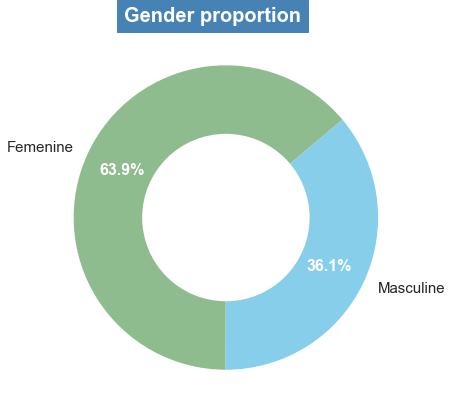

In [90]:
plt.style.use("seaborn-white")

# Creating plot
fig, ax = plt.subplots(figsize = (10, 7))
 
 
# Creating dataset
data = [(femenine * 100).round(2), (masculine * 100).round(2)]
labels = ["Femenine", "Masculine"]
explode = (0.1, 0) 

textprops = {"fontsize": 15}
_, _, autopcts = ax.pie(data, labels = labels, autopct = '%1.1f%%', pctdistance = 0.75, textprops = textprops,
                       shadow = False, startangle = 40, colors = ("darkseagreen", "skyblue"))

centre_circle = plt.Circle((0, 0), 0.55, fc = 'white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.setp(autopcts, **{'color':'white', 'weight':'bold', 'fontsize': 16})
plt.title("Gender proportion", position = (.465, 1), backgroundcolor = "steelblue", color = "white", fontsize = 20, weight = "bold")

plt.show()

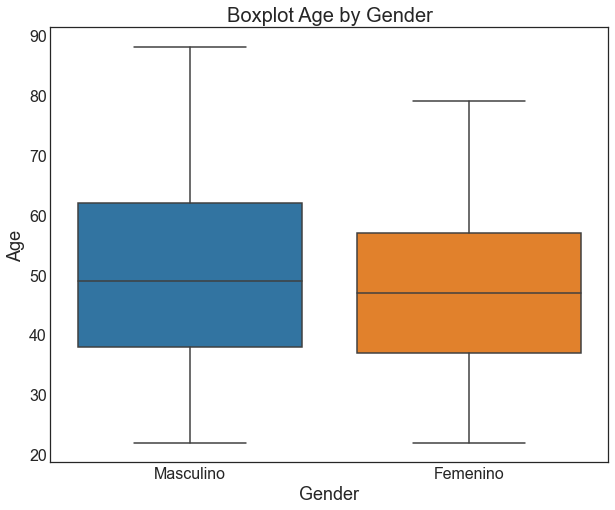

In [91]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.boxplot(x = "Gender", y = "Age", data = df_final)

plt.title("Boxplot Age by Gender", fontsize = 20)
plt.xlabel("Gender",  fontsize = 18)
plt.ylabel("Age",  fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)

plt.show()

In [92]:
masc_median = df_final.loc[df_final["Gender"] == "Masculino", "Age"].median()
fem_median = df_final.loc[df_final["Gender"] == "Femenino", "Age"].median()

print(f"Median masculine gender: {masc_median}")
print(f"Median femenine gender {fem_median}")

Median masculine gender: 49.0
Median femenine gender 47.0


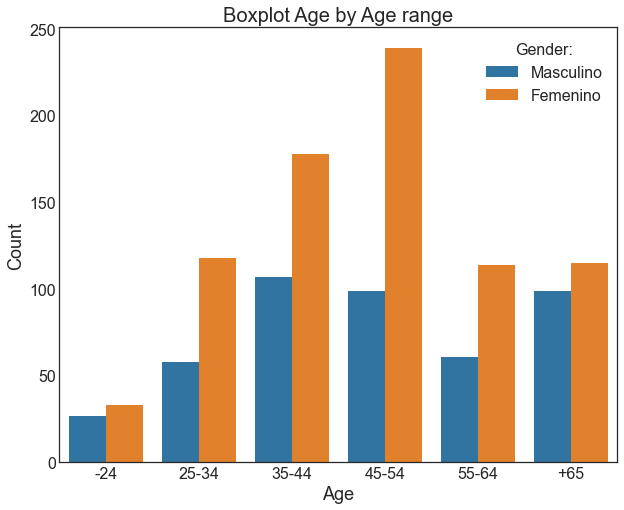

In [93]:
fig, ax = plt.subplots(figsize = (10, 8))

sns.countplot(x = "Age_range", data = df_final, hue = "Gender")

plt.title("Boxplot Age by Age range", fontsize = 20)
plt.xlabel("Age",  fontsize = 18)
plt.ylabel("Count",  fontsize = 18)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.legend(title = "Gender:", title_fontproperties = {"size": 16}, fontsize = 16)

plt.show()

In [94]:
specialties_prop = df_final.groupby("Specialty_ID")[["License_number"]].count() / df_final.shape[0] * 100
specialties_prop = specialties_prop.sort_values("License_number", ascending = False).round(2)
specialties_prop                                                

,License_number
Specialty_ID,
PEDIATRIA,12.02
MEDICINA DEL TRABAJO,10.98
CLINICA MEDICA,8.65
MEDICINA GENERAL,6.57
TOCOGINECOLOGIA,5.69
...,...
EMERGENTOLOGÍA,0.08
CIRUGIA VASCULAR PERIFERICA,0.08
ONCOLOGO INFANTIL.,0.08


In [95]:
specialties_top10 = specialties_prop.head(10)
specialties_top10

,License_number
Specialty_ID,
PEDIATRIA,12.02
MEDICINA DEL TRABAJO,10.98
CLINICA MEDICA,8.65
MEDICINA GENERAL,6.57
TOCOGINECOLOGIA,5.69
CIRUGIA GENERAL,4.65
CARDIOLOGIA,3.93
ANESTESIOLOGIA,3.85
MEDICINA LEGAL,3.77


In [96]:
specialties_top10_sort = specialties_top10.sort_values("License_number", ascending = True)

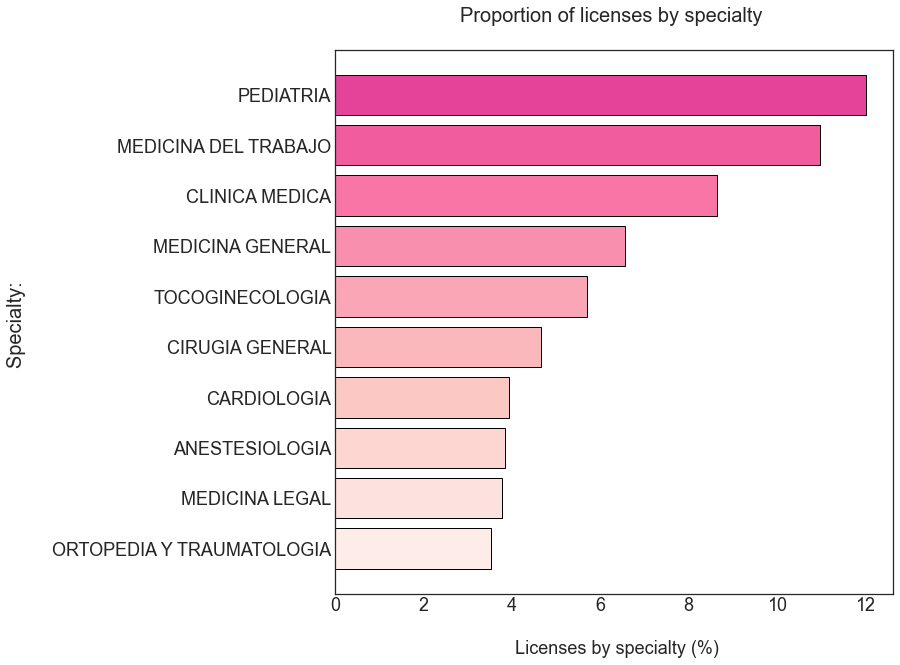

In [97]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (10, 10))

ax.barh(specialties_top10_sort.index, specialties_top10_sort["License_number"], color = sns.color_palette("RdPu", 16), edgecolor = "black")

plt.ylabel("Specialty: \n", fontsize = 20)
plt.xlabel("\n Licenses by specialty (%)", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of licenses by specialty \n", fontsize = 20)


plt.show()

In [98]:
effector_prop = df_final.groupby("Effector_name")[["License_number"]].count() / df_final.shape[0] * 100
effector_prop = effector_prop.sort_values("License_number", ascending = False).round(2)
effector_prop                                                

,License_number
Effector_name,
HOSPITAL SENILLOSA,20.75
HOSPITAL DR. NATALIO BURD,20.43
HOSPITAL BOUQUET ROLDAN,14.34
HOSPITAL EL CHOLAR,10.42
HOSPITAL LAS LAJAS,10.10
HOSPITAL ALUMINE,9.94
HOSPITAL ZAPALA,4.09
HOSPITAL JUNIN DE LOS ANDES,3.93
HOSPITAL EL CHOCON,3.85


In [99]:
effector_prop_sort = effector_prop.sort_values("License_number", ascending = True)

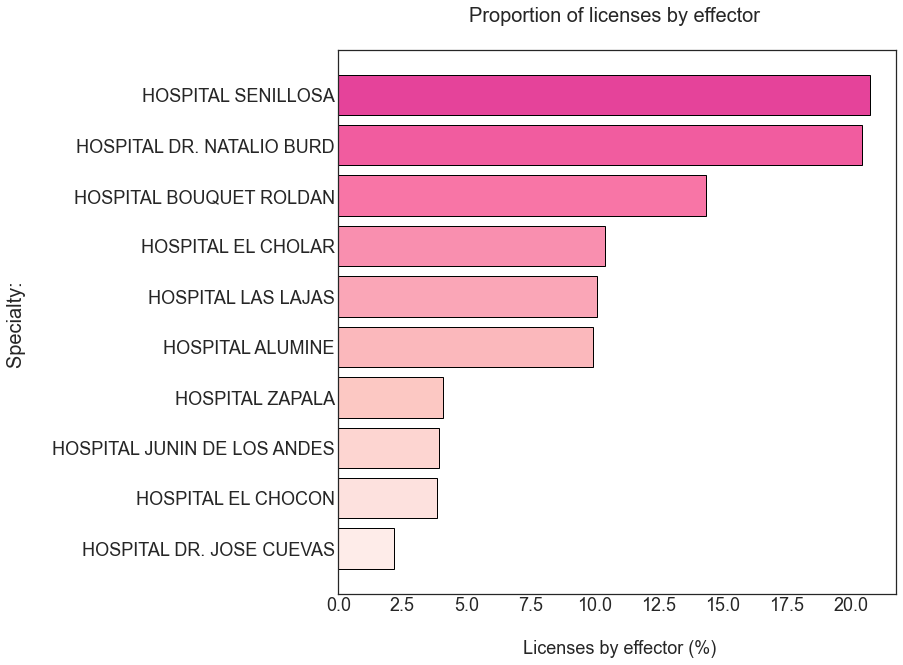

In [100]:
plt.style.use("seaborn-white")
fig, ax = plt.subplots(figsize = (10, 10))

ax.barh(effector_prop_sort.index, effector_prop_sort["License_number"], color = sns.color_palette("RdPu", 16), edgecolor = "black")

plt.ylabel("Specialty: \n", fontsize = 20)
plt.xlabel("\n Licenses by effector (%)", fontsize = 18)
plt.xticks(fontsize = 18)
plt.yticks(fontsize = 18)
plt.title("Proportion of licenses by effector \n", fontsize = 20)


plt.show()

In [101]:
print(f"Number of dataframe rows prior to elminate duplicates: {df_final.shape[0]}.")
print(f"Number of duplicates based on the 'ID' column': {df_final['ID'].duplicated().sum()}.")

Number of dataframe rows prior to elminate duplicates: 1248.
Number of duplicates based on the 'ID' column': 196.


In [102]:
df_final_withoutnulls = df_final.drop_duplicates(subset = "ID")
df_final_withoutnulls.shape

(1052, 17)

In [103]:
pyramid = pd.DataFrame()

for i in df_final_withoutnulls["Age_range"].unique():
    mask_m = (df_final_withoutnulls["Age_range"] == i) & (df_final_withoutnulls["Gender"] == "Masculino")
    mask_f = (df_final_withoutnulls["Age_range"] == i) & (df_final_withoutnulls["Gender"] == "Femenino")
    pyramid = pyramid.append({"Age": i, "M": mask_m.sum() , "F": mask_f.sum()}, ignore_index = True)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_8432\1515660426.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pyramid = pyramid.append({"Age": i, "M": mask_m.sum() , "F": mask_f.sum()}, ignore_index = True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8432\1515660426.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pyramid = pyramid.append({"Age": i, "M": mask_m.sum() , "F": mask_f.sum()}, ignore_index = True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8432\1515660426.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  pyramid = pyramid.append({"Age": i, "M": mask_m.sum() , "F": mask_f.sum()}, ignore_index = True)
C:\Users\Usuario\AppData\Local\Temp\ipykernel_8432\1515660426.py:6: FutureWarning: The frame.append 

In [104]:
pyramid

,Age,M,F
0,+65,76,89
1,25-34,48,94
2,-24,24,24
3,35-44,91,152
4,45-54,93,219
5,55-64,47,95


In [105]:
pyramid["M"] = pyramid["M"] / -1
pyramid["F"] = pyramid["F"] / 1

In [106]:
ages = ['+65', '55-64', '45-54', '35-44', '25-34', '-24']

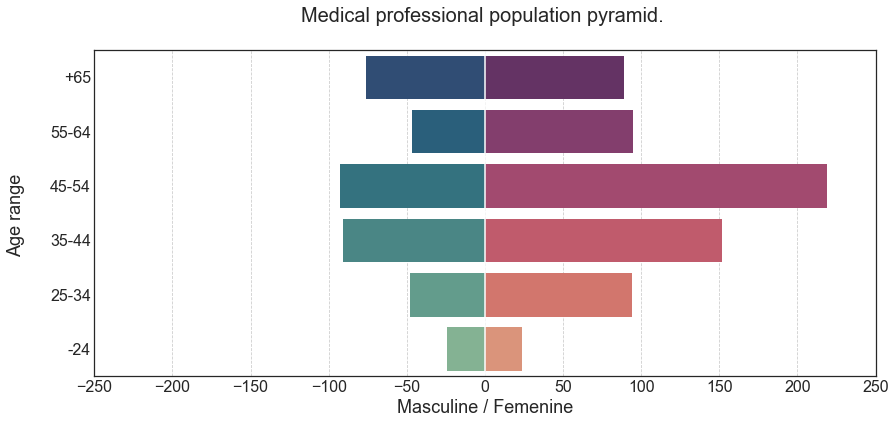

In [107]:
fig, axes = plt.subplots(figsize = (14, 6))

ax1 = sns.barplot(x = "M", y = "Age", data = pyramid, order = ages, palette = "crest_r")
ax2 = sns.barplot(x = "F", y = "Age", data = pyramid, order = ages, palette = "flare_r")

plt.title("Medical professional population pyramid. \n", fontsize = 20)
plt.xlabel("Masculine / Femenine", fontsize = 18)
plt.ylabel("Age range \n", fontsize = 18)

plt.yticks(fontsize = 16)
plt.xticks(ticks = [-250, -200, -150, -100, -50, 0, 50, 100, 150, 200, 250], fontsize = 16)

plt.axvline(x = 0, color = "white")
plt.grid(axis = "x", linestyle = "--")

plt.show()

In [108]:
location_data = df_final[["Effector_name", "Lat", "Long"]]

In [109]:
fig = Figure(width = 500, height = 300)

neuquen_map = folium.Map(location = [location_data["Lat"].mean(),
                                 location_data["Long"].mean()],
                                 zoom_start = 7)
for (index, row) in location_data.iterrows():
    folium.Marker(location = [row.loc["Lat"], row.loc["Long"]], 
                  popup = row.loc["Effector_name"], 
                  tooltip = row.loc["Effector_name"]).add_to(neuquen_map)
fig.add_child(neuquen_map)
fig

In [ ]:
neuquen_map.save("neuquen_map.html")

You can see the map in the `file neuquen_map.html` uploaded on my github

In [111]:
fig = Figure(width = 500, height = 300)

neuquen_map2 = folium.Map(location = [location_data["Lat"].mean(),
                                 location_data["Long"].mean()],
                                 zoom_start = 7)

marker_cluster = MarkerCluster().add_to(neuquen_map2)

for (index, row) in location_data.iterrows():
    folium.Marker(location = [row.loc["Lat"], row.loc["Long"]], popup = row.loc["Effector_name"]).add_to(marker_cluster) #popup = row.loc["Effector_name"]

fig.add_child(neuquen_map2)
fig

In [112]:
neuquen_map2.save("neuquen_map2.html")

You can see the map in the `file neuquen_map2.html` uploaded on my github

<a id='6'></a>

---

# 6. Conclusion

- In the analysis carried out, with some simulated data, it was possible to observe that 62% of medical professionals correspond to the female gender, with a median of 49 for the female gender and 46 for the male gender..

- It is observed that the majority of medical professionals are in the range of 35-54 years of age.

- On the basis of the number of enrollments (since a doctor may have more than one enrollment) the specialties of Pediatrics, Medicina del Trabajo and Clínica Mëdica are the ones that predominate.

- The effector with the largest number of licenses is the Hopsital Dr. Natalio Burd.